## Part I. The Housing Prices

In [1]:
import pandas as pd
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [2]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Give 3 examples of continuous and categorical features in the dataset; choose one feature of each type and plot the histogram to illustrate the distribution.

Categorical features: Heating Type & Type of Roof

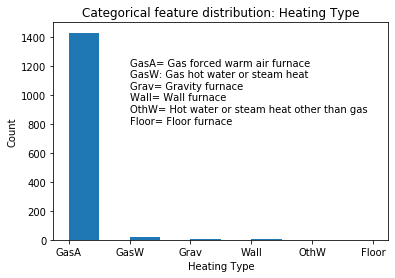

In [5]:
import matplotlib.pyplot as plt

plt.hist(train['Heating'])
plt.ylabel('Count')
plt.xlabel('Heating Type')
plt.title('Categorical feature distribution: Heating Type')
plt.text(1, 800, 'GasA= Gas forced warm air furnace\nGasW: Gas hot water or steam heat\nGrav= Gravity furnace\nWall= Wall furnace\nOthW= Hot water or steam heat other than gas\nFloor= Floor furnace')
plt.show()

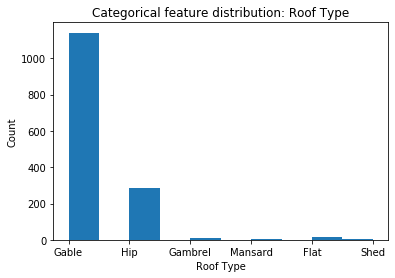

In [6]:
plt.hist(train['RoofStyle'])
plt.ylabel('Count')
plt.xlabel('Roof Type')
plt.title('Categorical feature distribution: Roof Type')
plt.show()

Continuous features: LotArea & SalePrice

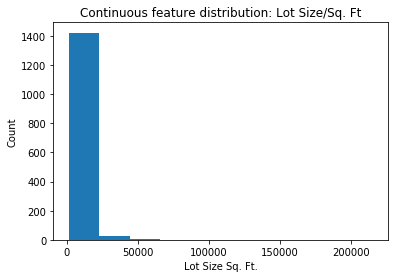

In [7]:
plt.hist(train['LotArea'])
plt.ylabel('Count')
plt.xlabel('Lot Size Sq. Ft.')
plt.title('Continuous feature distribution: Lot Size/Sq. Ft')
plt.show()

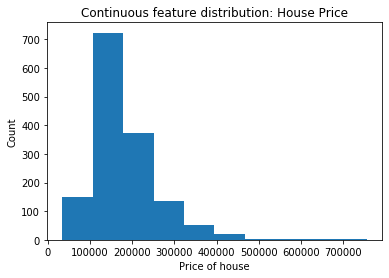

In [8]:
plt.hist(train['SalePrice'])
plt.ylabel('Count')
plt.xlabel('Price of house')
plt.title('Continuous feature distribution: House Price')
plt.show()

### 3. Data pre-processing
Pre-process your data, explain your pre-processing steps and the reasons why you need them.
(Hint: data pre-processing steps can include but are not restricted to: dealing with missing values,
normalizing numerical values, dealing with categorical values etc.)

#### Step 1: Dealing with mixed-datatype columns

The 'NaN' values in this dataset do not signify missing data - they signify that a feature of the home is missing. This information is important, but currently each 'NaN' is listed as a float datatype in a column of all string values. **I need to change each 'NaN' float in columns with other string values to a string datatype as well, in order to capture this None value during one hot encoding of categorical variables in a few steps.**

In [9]:
#all column titles with a mix of nan (float dtype) and str dtypes
nan_fix = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
          'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
          'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

#all col titles that include string values only
str_vars = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
           'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation',
           'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
           'SaleType', 'SaleCondition', 'ExterCond']
#all col titles that include int values only
int_vars = ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
           'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
           'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
           'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [10]:
# change NaN float to NaN str in nan_fix columns (above)

#for each column in specific columns that include 'NaN' above
for i in nan_fix:
    #for each row in the train datatable
    for j in range(train.shape[0]):
        #change 'NaN' float to 'None' string
        if type(train[i][j]) == float:
            train[i][j] = 'None'

/Users/kristenflaherty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


####  Give some examples of features that you think should use a one-hot encoding and explain why. Convert at least one feature to a one-hot encoding (you can use your own implementation, or that in pandas or scikit-learn) and visualize the results by plotting feature histograms of the original feature and its new one-hot encoding.

All of the features that are categorical (Fence, Electrical, Garage Type, etc.) should be one hot encoded because they contain characteristics of the house features; they do not contain integer values that can be properly processed and accounted for in a regression model. It's necessary to convert all of these categorical features into integer/dummy variables in order for the model to process them if they are inputs.

**Below, I one hot encode the Building Type, Lotshape, and Neighborhood. I selected these features because I think that they will affect the price of the house more than other features in the regression model. These features need to be one hot encoded because they are all categorical features currently in the dataset.**

In [11]:
#add all nan_fix columns into str_vars columns before one hot encoding
str_vars = str_vars + nan_fix

In [12]:
#use one hot encoding to transform all categorical features --> str_vars
new_train = pd.get_dummies(train, columns=['BldgType'], prefix ='New')

In [13]:
#get columns that only have new dummy var fence info
bldgtype = new_train.iloc[: , 80:].sum()

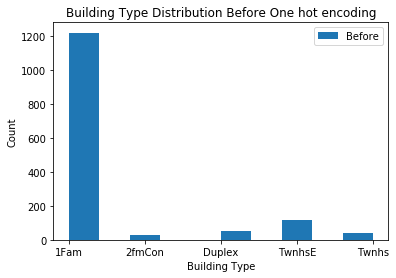

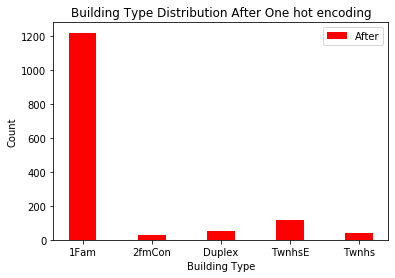

In [14]:
#build original fence type distribution
plt.hist([train['BldgType']], label=['Before'])
plt.legend(loc='upper right')
plt.title('Building Type Distribution Before One hot encoding')
plt.ylabel('Count')
plt.xlabel('Building Type')
plt.show()

#build after distribution using one hot encoding dummy vars
plt.bar(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], [bldgtype[0], bldgtype[1],
         bldgtype[2], bldgtype[4], bldgtype[3]], label='After', color='r', width=.4)
plt.legend(loc='upper right')
plt.title('Building Type Distribution After One hot encoding')
plt.ylabel('Count')
plt.xlabel('Building Type')
plt.show()

In [15]:
new_train_2 = pd.get_dummies(train, columns=['LotShape'], prefix ='New')
lotshape = new_train_2.iloc[:, 80:].sum()

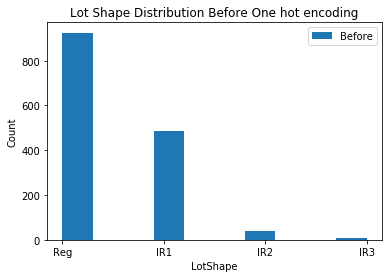

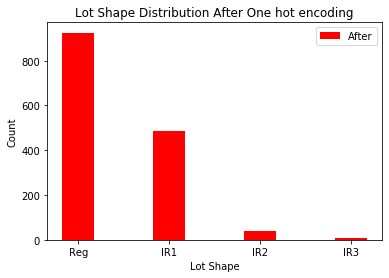

In [16]:
#build original street access distribution
plt.hist([train['LotShape']], label=['Before'])
plt.legend(loc='upper right')
plt.title('Lot Shape Distribution Before One hot encoding')
plt.ylabel('Count')
plt.xlabel('LotShape')
plt.show()

#build after distribution using one hot encoding dummy vars
plt.bar(['Reg', 'IR1', 'IR2', 'IR3'], [lotshape[3], lotshape[0],
         lotshape[1], lotshape[2]], label='After', color='r', width=.35)
plt.legend(loc='upper right')
plt.title('Lot Shape Distribution After One hot encoding')
plt.ylabel('Count')
plt.xlabel('Lot Shape')
plt.show()

In [17]:
new_train_3 = pd.get_dummies(train, columns=['Neighborhood'], prefix ='New')
neighb = new_train_3.iloc[:, 80:].sum()

In [18]:
neighborder= [neighb[5], neighb[24], neighb[6], neighb[15], neighb[11], neighb[21], neighb[14], neighb[17], neighb[3], neighb[19], neighb[16], neighb[12], neighb[20], neighb[9], neighb[10], neighb[7], neighb[23], neighb[8], neighb[22], neighb[4], neighb[13], neighb[0], neighb[2], neighb[18], neighb[1]]

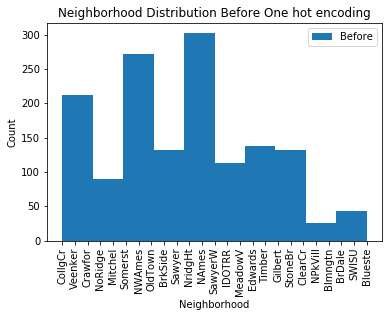

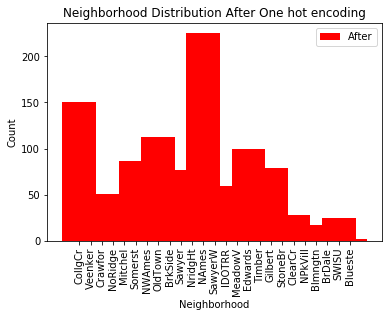

In [19]:
#build original street access distribution
plt.hist([train['Neighborhood']], label=['Before'])
plt.legend(loc='upper right')
plt.title('Neighborhood Distribution Before One hot encoding')
plt.ylabel('Count')
plt.xlabel('Neighborhood')
plt.xticks(list(train['Neighborhood'].unique()), rotation='vertical')
plt.show()

#build after distribution using one hot encoding dummy vars
plt.bar(list(train['Neighborhood'].unique()), neighborder, label='After', color='r', width=3)
plt.legend(loc='upper right')
plt.title('Neighborhood Distribution After One hot encoding')
plt.ylabel('Count')
plt.xlabel('Neighborhood')
plt.xticks(list(train['Neighborhood'].unique()), rotation='vertical')
plt.show()

## OLS to Predict House Prices
Choose the features (or combinations of features) you would like to use or ignore, provided you justify your choice.

Features chosen & reasoning:
- **Neighborhood**: some neighbhoroods might be nicer yielding higher house prices, while some neighborhoods might be less nice and yield lower house prices.
- **LotShape**: a bigger or wider lot may increase the price of the house on the lot.
- **Building Type**: homes that fit more people (ie families with children, vs one or two person home) will be more expensive because they will have more space in the homes.
- **LotArea**: a bigger or wider lot may increase the price of the house on the lot.
- **Condition1**: homes closer to main roads will be cheaper. (I leave out Condition2 because the length of possible values of condition2 in the training set is not equivalent to the length of possible values in condition2 in the test set.)
- **YearRemodAdd**: newly renovated homes tend to be higher priced.
- **CentralAir**: air conditioned homes are usually more expensive than non air conditioned homes.
- **OverallCond & OverallQual**: homes that are in better condition will be more money than homes that are in poor condition.

I leave out other features because I don't hypothesize that they will have as big of an impact on the prediction of house prices as the features listed above.

In [20]:
#somehow get all of these dataframes into one?
x_train = train[['Neighborhood', 'BldgType', 'LotShape', 'LotArea', 'Condition1', 'YearRemodAdd',
              'CentralAir', 'OverallCond', 'OverallQual', 'SalePrice']]
#somehow get all of these dataframes into one?
x_test = test[['Neighborhood', 'BldgType', 'LotShape', 'LotArea', 'Condition1', 'YearRemodAdd',
              'CentralAir', 'OverallCond', 'OverallQual']]

In [21]:
x_train

,Neighborhood,BldgType,LotShape,LotArea,Condition1,YearRemodAdd,CentralAir,OverallCond,OverallQual,SalePrice
0,CollgCr,1Fam,Reg,8450,Norm,2003,Y,5,7,208500
1,Veenker,1Fam,Reg,9600,Feedr,1976,Y,8,6,181500
2,CollgCr,1Fam,IR1,11250,Norm,2002,Y,5,7,223500
3,Crawfor,1Fam,IR1,9550,Norm,1970,Y,5,7,140000
4,NoRidge,1Fam,IR1,14260,Norm,2000,Y,5,8,250000
...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,1Fam,Reg,7917,Norm,2000,Y,5,6,175000
1456,NWAmes,1Fam,Reg,13175,Norm,1988,Y,6,6,210000
1457,Crawfor,1Fam,Reg,9042,Norm,2006,Y,9,7,266500
1458,NAmes,1Fam,Reg,9717,Norm,1996,Y,6,5,142125


In [22]:
for col in ['Neighborhood', 'BldgType', 'LotShape', 'Condition1', 'CentralAir']:
    x_train = pd.get_dummies(x_train, columns=[col], prefix ='New', drop_first=True)
    x_test = pd.get_dummies(x_test, columns=[col], prefix ='New', drop_first=True)

In [23]:
for col in ['LotArea', 'YearRemodAdd', 'OverallCond', 'OverallQual']:
    x_train[col] = (x_train[col] - x_train[col].mean())/x_train[col].std()
    x_test[col] = (x_test[col] - x_test[col].mean())/x_test[col].std()

In [24]:
x_train

,LotArea,YearRemodAdd,OverallCond,OverallQual,SalePrice,New_Blueste,New_BrDale,New_BrkSide,New_ClearCr,New_CollgCr,...,New_Reg,New_Feedr,New_Norm,New_PosA,New_PosN,New_RRAe,New_RRAn,New_RRNe,New_RRNn,New_Y
0,-0.207071,0.878367,-0.517023,0.651256,208500,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
1,-0.091855,-0.429430,2.178881,-0.071812,181500,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,0.073455,0.829930,-0.517023,0.651256,223500,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,-0.096864,-0.720051,-0.517023,0.651256,140000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.375020,0.733056,-0.517023,1.374324,250000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260471,0.733056,-0.517023,-0.071812,175000,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1456,0.266316,0.151813,0.381612,-0.071812,210000,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1457,-0.147760,1.023678,3.077516,0.651256,266500,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1458,-0.080133,0.539309,0.381612,-0.794879,142125,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [25]:
#OLS thetas for each var
import numpy as np
x = x_train.drop(columns=['SalePrice'])
y = x_train['SalePrice']

In [26]:
theta_best = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
theta_best_df = pd.DataFrame(data=theta_best[np.newaxis, :], columns=x.columns)
theta_best_df

,LotArea,YearRemodAdd,OverallCond,OverallQual,New_Blueste,New_BrDale,New_BrkSide,New_ClearCr,New_CollgCr,New_Crawfor,...,New_Reg,New_Feedr,New_Norm,New_PosA,New_PosN,New_RRAe,New_RRAn,New_RRNe,New_RRNn,New_Y
0,9947.349498,8727.708324,-2236.533967,43600.089008,109253.802163,94353.214656,95505.155369,117274.670206,94642.866668,130907.453424,...,2025.915114,39431.320102,47274.197102,64541.441831,61071.361028,26963.511079,44951.774539,40904.08142,53067.660612,32729.524878


In [27]:
#make predictions with these thetas
y_pred = x.dot(theta_best)

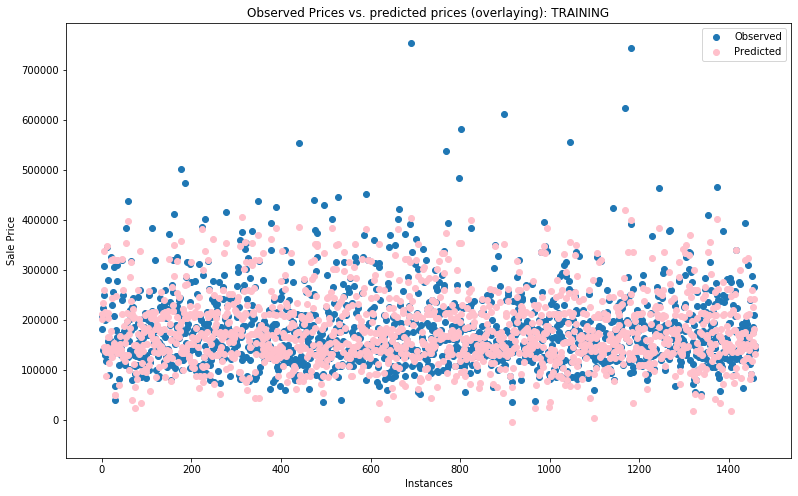

In [28]:
plt.figure(figsize = (13,8))
plt.scatter([range(0, 1460)], y, label='Observed')
plt.scatter([range(0, 1460)], y_pred, label='Predicted', color='pink')
plt.xlabel('Instances')
plt.ylabel('Sale Price')
plt.title('Observed Prices vs. predicted prices (overlaying): TRAINING')
plt.legend()
plt.show()

In [29]:
# #calculate R squared value

# #sum of the sqaured(observed minus predicted)
rss = sum( (y - y_pred)   **2 )
# #sum of the squared(observed - mean of observed)
tss = sum(  (y - y.mean()) **2) 
score  = 1-(rss/tss)
print('R^2=', score)

R^2= 0.7257538848929185


In [30]:
#calculate Mean Squared Error
def mean_squared_error(theta, X, y):
    """The cost function, J, describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return 0.5 * np.mean(   (   (y - (X.dot(theta)) )  **2)    ) 

In [31]:
print('MSE= ', mean_squared_error(theta_best, x, y))

MSE=  864806134.1668663


OLS help: https://towardsdatascience.com/manually-computing-coefficients-for-an-ols-regression-using-python-50d8e413de

## Testing results

In [32]:
y_pred_test = x_test.dot(theta_best)

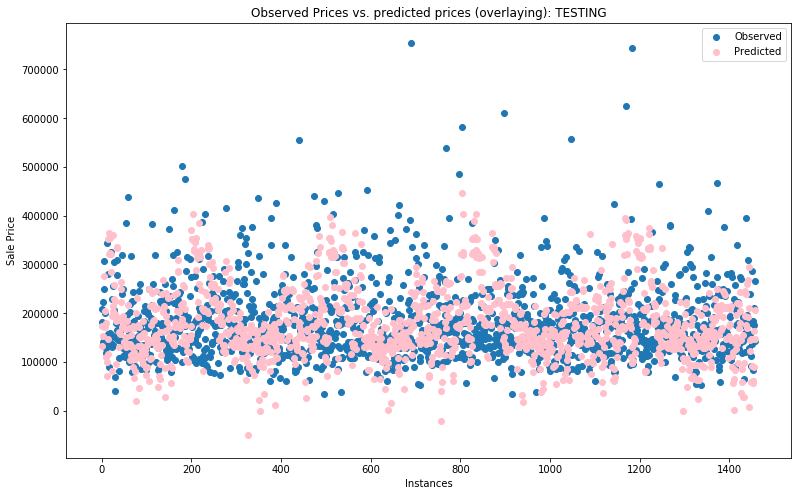

In [33]:
plt.figure(figsize = (13,8))
plt.scatter([range(0, 1459)], y[:-1], label='Observed')
plt.scatter([range(0, 1459)], y_pred_test, label='Predicted', color='pink')
plt.xlabel('Instances')
plt.ylabel('Sale Price')
plt.title('Observed Prices vs. predicted prices (overlaying): TESTING')
plt.legend()
plt.show()

#### Save predictions and upload to Kaggle

In [34]:
dffinal = pd.DataFrame(columns=['Id', 'SalePrice'])
dffinal['Id'] = test['Id']
dffinal['SalePrice'] = y_pred_test

In [44]:
dffinal.to_csv('finalhousing.csv', index=False)

In [45]:
print('Kaggle Score = 0.62296')

Kaggle Score = 0.62296
